# Ch02.11. 실전-재정데이터 시각화 경진대회

---

* 날짜:2022-05-02
* 이름:안창덕

[재정 데이터 시각화 경진대회](https://dacon.io/competitions/official/235767/overview/description)

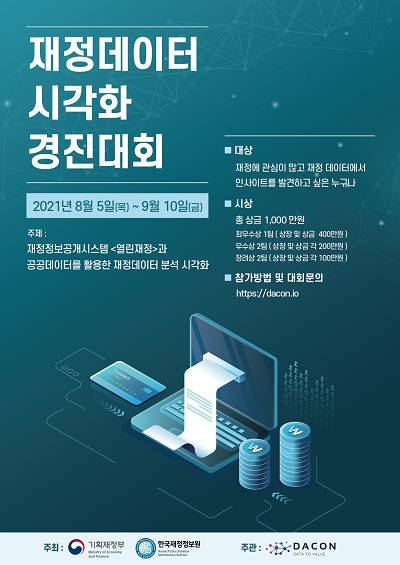

## Step 1 : 시작 해보기
---

**주제** : 연도에 따른 분야별 재정지출 추이 및 비율 시각화

### | **환경세팅**

* matplotlib에서 사용할 수 있는 폰트 확인

In [ ]:
import matplotlib.font_manager as fm

fm.fontManager.ttflist

* 라이브러리 임포트 및 세팅

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os # 파일 경로에 관한 라이브러리

sns.set(font_scale=1.2, style='white', palette='tab20')
# 폰트 설정


* 한글 폰트 설치

In [ ]:
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


* 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* 라이브러리 소개 : `tree` : 디렉토리 트리구조를 확인할 수 있다.

In [ ]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (360 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend:

### | **데이터 확보**

데이터를 처리 하기 전 Step1 에서 진행 할 주제를 정의합니다. 

* 주제 : 분야별 재정구조 예산 추이(지난 6~7년)

* 경로 설정

In [ ]:
df_path = '/content/drive/MyDrive/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출'

* 트리를 이용해 하위 폴더 구조 확인

In [ ]:
! tree '/content/drive/MyDrive/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출'

* 하위폴더 확인 및 정의

In [ ]:
fields = os.listdir(df_path) # 폴더가 많다면 for 문 활용
fields = ['교통 및 물류 분야',
'농림수산 분야',
'보건 분야',
'공공질서 및 안전 분야',
'과학기술 분야',
'문화 및 관광 분야',
'국토 및 지역개발 분야',
'교육 분야',
'국방 분야',
'사회복지 분야',
'통신 분야',
'환경 분야',
'산업·중소기업 및 에너지 분야',
'통일·외교 분야',
'일반·지방행정 분야']

* 분야별 데이터 프레임 확보

In [ ]:
dfs=[]
for field in fields:
  f= f'{df_path}/{field}/{field} 재정구조.CSV'
  print(field, f)
  df = pd.read_csv(f, encoding='CP949')
  dfs.append(df)


  
  #print(os.path.isfile(f)  )#파일 f가 존재하는지 확인 isfile

교통 및 물류 분야 /content/drive/MyDrive/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/교통 및 물류 분야/교통 및 물류 분야 재정구조.CSV
농림수산 분야 /content/drive/MyDrive/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/농림수산 분야/농림수산 분야 재정구조.CSV
보건 분야 /content/drive/MyDrive/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/보건 분야/보건 분야 재정구조.CSV
공공질서 및 안전 분야 /content/drive/MyDrive/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/공공질서 및 안전 분야/공공질서 및 안전 분야 재정구조.CSV
과학기술 분야 /content/drive/MyDrive/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/과학기술 분야/과학기술 분야 재정구조.CSV
문화 및 관광 분야 /content/drive/MyDrive/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분ᄋ

* 각 데이터 프레임 확인

In [ ]:
for field, df in zip(fields, dfs):
  print(field)
  print(df)

교통 및 물류 분야
     연도   기준  합계예산(억원)  부문당 예산(억원)  프로그램당 예산(억원)  단위사업당 예산(억원)  세부사업당 예산(억원)
0  2015   결산    208920       34820          5357           937           236
1  2016   결산    190500       31750          5013           982           242
2  2017   결산    184756       30793          5132          1015           242
3  2018   결산    152515       25419          4237           829           208
4  2019   결산    162935       32587          4792           881           216
5  2020  본예산    191844       38369          5813          1037           249
6  2021  본예산    214243       42849          6492          1134           258
농림수산 분야
     연도   기준  합계예산(억원)  부문당 예산(억원)  프로그램당 예산(억원)  단위사업당 예산(억원)  세부사업당 예산(억원)
0  2015   결산    191130       47783          3901           787           275
1  2016   결산    187369       46842          3824           794           301
2  2017   결산    193670       48418          3873           821           306
3  2018   결산    195821       48955  

### | **데이터 처리**

* 데이터 통합

In [ ]:
df = pd.concat(dfs, axis=0, ignore_index=True) #ignore는 인덱스를 0123456 0123456 으로 출력 안하게끔
df

,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원)
0,2015,결산,208920,34820,5357,937,236
1,2016,결산,190500,31750,5013,982,242
2,2017,결산,184756,30793,5132,1015,242
3,2018,결산,152515,25419,4237,829,208
4,2019,결산,162935,32587,4792,881,216
...,...,...,...,...,...,...,...
100,2017,결산,643436,107239,9749,1838,703
101,2018,결산,683844,113974,10521,2035,794
102,2019,결산,753543,125591,11593,2290,861
103,2020,본예산,790129,131688,12156,2366,907


* 통합된 데이터프레임에 '분야' 컬럼 추가 

In [ ]:
fields = ['교통',
 '농림수산',
 '보건',
 '공공안전',
 '과학기술',
 '문화관광',
 '국토개발',
 '교육',
 '국방',
 '사회복지',
 '통신',
 '환경',
 '산업',
 '통일외교',
 '일반행정']

In [ ]:
fields
#['교통 및....']
df['분야'] = [field for field in fields for i in range(7)]

In [ ]:
df

,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원),분야
0,2015,결산,208920,34820,5357,937,236,교통
1,2016,결산,190500,31750,5013,982,242,교통
2,2017,결산,184756,30793,5132,1015,242,교통
3,2018,결산,152515,25419,4237,829,208,교통
4,2019,결산,162935,32587,4792,881,216,교통
...,...,...,...,...,...,...,...,...
100,2017,결산,643436,107239,9749,1838,703,일반행정
101,2018,결산,683844,113974,10521,2035,794,일반행정
102,2019,결산,753543,125591,11593,2290,861,일반행정
103,2020,본예산,790129,131688,12156,2366,907,일반행정


* 데이터프레임 요약

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   연도            105 non-null    int64 
 1   기준            105 non-null    object
 2   합계예산(억원)      105 non-null    int64 
 3   부문당 예산(억원)    105 non-null    int64 
 4   프로그램당 예산(억원)  105 non-null    int64 
 5   단위사업당 예산(억원)  105 non-null    int64 
 6   세부사업당 예산(억원)  105 non-null    int64 
 7   분야            105 non-null    object
dtypes: int64(6), object(2)
memory usage: 6.7+ KB


### | **데이터 시각화**

* `groupby`로 연도별 총 예산 추이 시각화

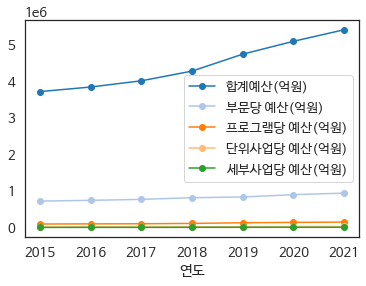

In [ ]:
gru = df.groupby('연도').sum()
gru = gru.iloc[1:]
gru.plot(marker='o') # 판다스 데이터프레임 시각화

* 피벗테이블로 시각화하기

In [ ]:
#분야 별 연도 값 합계예산
piv = pd.pivot_table(data=df, index='분야', columns='연도', values='합계예산(억원)', sort=False)
piv.style.background_gradient()

연도,2014,2015,2016,2017,2018,2019,2020,2021
분야,,,,,,,,
교통,nan,208920.000000,190500.000000,184756.000000,152515.000000,162935.000000,191844.000000,214243.000000
농림수산,nan,191130.000000,187369.000000,193670.000000,195821.000000,204327.000000,215153.000000,226557.000000
보건,nan,111881.000000,104749.000000,102808.000000,106925.000000,119351.000000,135219.000000,146968.000000
공공안전,nan,167252.000000,174966.000000,183342.000000,188128.000000,202277.000000,208371.000000,223050.000000
과학기술,nan,65070.000000,66769.000000,70076.000000,69809.000000,72507.000000,82413.000000,89798.000000
문화관광,61963.000000,67212.000000,69327.000000,63239.000000,72003.000000,80181.000000,84816.000000,nan
국토개발,nan,45298.000000,39793.000000,34732.000000,36790.000000,43509.000000,40467.000000,50847.000000
교육,nan,524707.000000,553716.000000,591921.000000,643411.000000,705300.000000,726344.000000,712076.000000
국방,nan,355926.000000,368460.000000,379425.000000,412322.000000,449063.000000,486935.000000,514176.000000


* 연도별 합계예산 추이

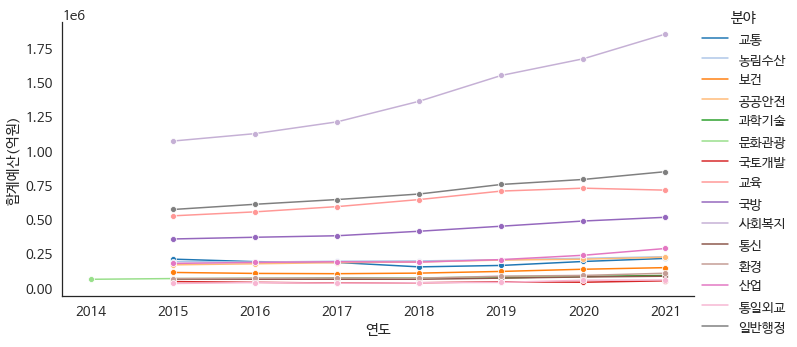

In [ ]:
sns.relplot(data=df, x='연도', y='합계예산(억원)', kind='line',
            hue='분야', aspect=2, marker='o')

* 연도에 따른 분야별 파이차트

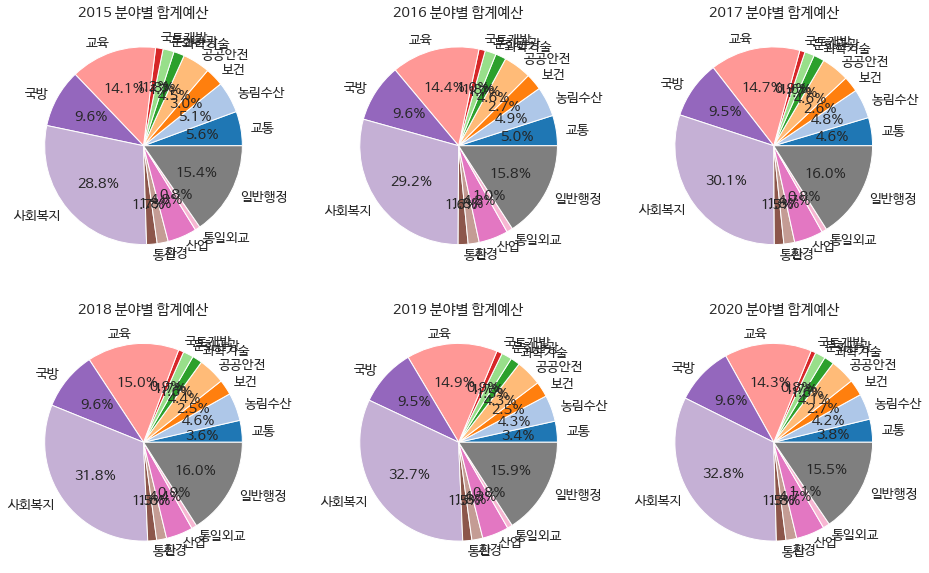

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(16, 10))
axes = axes.flatten()

for year, ax in zip(range(2015, 2021), axes):
  ax.set_title(f'{year} 분야별 합계예산')
  ax.pie(piv[year], labels=fields, autopct='%.1f%%')

plt.show()

  * 정리하기
    - 6년간 전체 예산 금액이 꾸준히 증가하였다.
    - 6년간 사회복지 재정 비율이 꾸준히 증가하였다.
    - 분야별로는 사회복지, 교육, 지방행정, 국방 순으로 비중을 차지하고있다. 
      

## Step 2 : 따라 해보기
---

https://dacon.io/competitions/official/235767/codeshare/3238?page=1&dtype=random

In [ ]:
import os
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/한국재정정보원_dataset/열린재정_dataset/재정데이터 시각화모델 경진대회 데이터_열린재정/1. 예산/1-1-2. 세출 지출 세목 예산편성현황(총액).xlsx',sheet_name='Sheet0')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df_work = df[df.iloc[:,1]=='고용노동부']
df_young = df_work[df_work.loc[:,'단위사업명'].str.contains('청년')]

In [ ]:
total_work = df_work.groupby(['회계년도'])['국회확정금액(천원)'].sum()
subtotal_young = df_young.groupby(['회계년도'])['국회확정금액(천원)'].sum()
young_ratio = pd.DataFrame(subtotal_young/total_work)

In [ ]:
young_ratio.iloc[:,0]

회계년도
2011    0.013520
2012    0.012793
2013    0.013377
2014    0.009162
2015    0.007926
2016    0.009039
2017    0.006923
2018    0.009398
2019    0.030738
2020    0.040910
2021    0.049402
Name: 국회확정금액(천원), dtype: float64

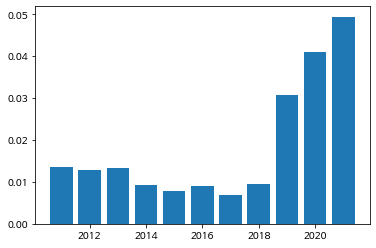

In [ ]:
plt.bar(young_ratio.index.values,young_ratio.iloc[:,0])
plt.show()

2019년부터 청년과 관련된 고용 노동부 사업의 비중이 증가하였습니다. 하지만 5%로 여전히 낮은 비중입니다.

In [ ]:
df_young_3 = df_young[df_young.loc[:,'회계년도']>=2019]

In [ ]:
df_young_3_total = pd.DataFrame(df_young_3.groupby(['회계년도', '세부사업명'])['국회확정금액(천원)'].sum())
df_young_3_total.reset_index(inplace=True) #원본의 인덱스를 대체한다. inplace는 생략가능하다.

In [ ]:
df_young_3_pivot = pd.DataFrame(df_young_3.groupby(['회계년도','세부사업명'])['국회확정금액(천원)'].sum().unstack()).fillna(0)   #unstack()안겹치게 전부표시
df_young_3_pivot

세부사업명,고용보험기금 전출(청년 및 적극적 노동시장정책 지원),인문특화청년취업아카데미,직업정보제공및직업지도,청년구직활동지원금,청년내일채움공제,청년내일채움공제(고보),청년내일채움공제(일반),청년일자리창출지원,청년취업아카데미,청년취업진로 및 일경험 지원,한국잡월드운영,한국잡월드운영지원,해외취업지원,호남권직업체험센터설립
회계년도,,,,,,,,,,,,,,
2019,0.0,21121000.0,0.0,158186000.0,997132000.0,0.0,0.0,0.0,0.0,26041000.0,21180000.0,0.0,56002000.0,0.0
2020,400000000.0,0.0,0.0,0.0,0.0,503268000.0,778704000.0,0.0,18444000.0,26041000.0,25449000.0,0.0,59574000.0,8085000.0
2021,580000000.0,0.0,3811000.0,0.0,0.0,493592000.0,908102000.0,467600000.0,0.0,21931000.0,0.0,26962000.0,52625000.0,0.0


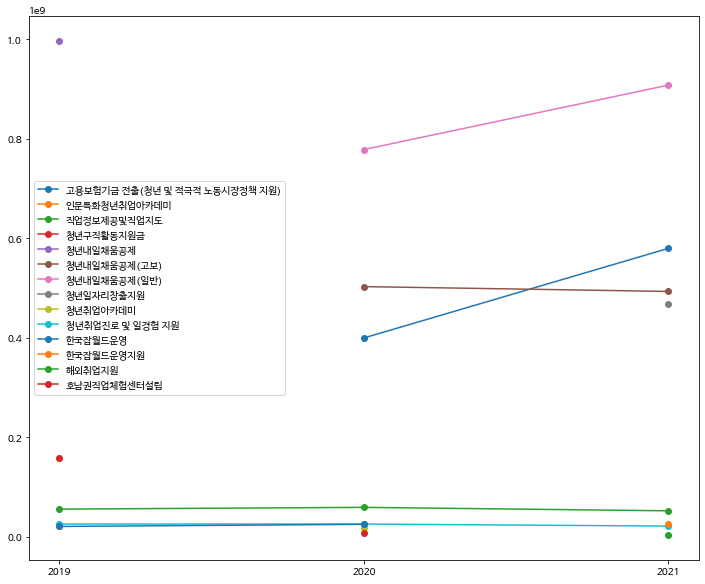

In [ ]:
plt.figure(figsize=(12,10))
ax = plt.subplot()
for i in sorted(pd.Series.unique(df_young_3_total['세부사업명'])) :
    x = df_young_3_total[df_young_3_total['세부사업명'] == i]['회계년도']
    y = df_young_3_total[df_young_3_total['세부사업명'] == i]['국회확정금액(천원)']
    plt.plot(x, y, label=i,marker='o')
plt.legend(loc=6)
ax.set_xticks([2019, 2020, 2021])
plt.show()

**2021년도 청년 관련 사업 예산 비중**

청년 내일 채움 공제의 비중이 54.8%로 가장 높게 나타났다(일반 35.5% + 고보 19.3%)

2위 : 고용보험 기금 전출(청년 및 적극적 노동시장 정책 지원) 22.7%

3위 : 청년 일자리 창출 지원 18.3%

청년 내일 채움 공제의 경우 가장 많은 예산이 배분되었음에도 불구하고 상반기만에 예산이 모두 끝나 하반기 중소기업에 취업한 청년들의 경우 혜택을 22년도에 적용 받을 수 있다. 이에 가장 효용성이 높은 정책이나 사람들이 많이 이용하고 있는 정책에 대해서 고민해보고 예산 책정에 활용하면 좋을 것으로 판단된다.

In [ ]:
df_young_3_total_2021 = df_young_3_total[df_young_3_total['회계년도']==2021]
df_young_3_total_2021_ratio = df_young_3_total_2021['국회확정금액(천원)']/df_young_3_total_2021['국회확정금액(천원)'].sum(axis=0)
df_young_3_total_2021_label = df_young_3_total_2021['세부사업명']

In [ ]:
df_young_2021_pie = pd.DataFrame({'비율': df_young_3_total_2021_ratio,'세부사업명': df_young_3_total_2021_label}).sort_values(by='비율',ascending=False)

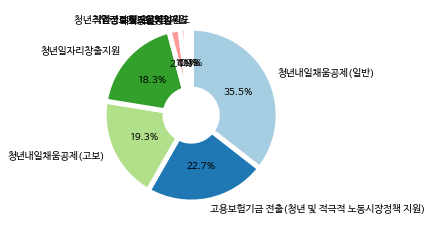

In [ ]:
palette = sns.color_palette("bright")
sns.set_palette("Paired")

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_young_2021_pie['비율'], labels=df_young_2021_pie['세부사업명'], autopct='%.1f%%', wedgeprops=wedgeprops, startangle=90, counterclock=False)
plt.show()

# 4. 결론

본 분석은 고용노동부에서 사용하고 있는 예산을 살펴보는 간단한 시각화 분석이었습니다.
청년들을 대상으로 하는 프로그램이 무엇이 있고, 그 외에 모든 사람을 대상으로 하는 프로그램이 어떤 것이 있는지 비교해 보았습니다.
그 결과, 고용노동부에서 청년을 타겟으로 한 프로그램에 할당된 예산은 약 5%였습니다.(단위 사업명 기준).
세부적으로는 내일 채움 공제에 할당된 예산이 가장 높았다(54.8%).
모든 사람들 대상으로 하는 프로그램은 대부분 구직 급여의 비중이 가장 높았다(29.9%).
전반적으로 고용노동부에서 진행하고 있는 프로그램들이 사람들에게 돈을 직접적으로 주는 형태의 프로그램의 비중이 높았다. 이는 현금을 직접 수령할 수 있기에 받는 사람의 활용폭이 좋고 생활에 직접적으로 도움일 될 수 있다는 점에서 좋은 제도라고 개인적으로 평가한다.
또한 내일채움공제의 경우 명확한 목표 금액이 있기 때문에 중소기업을 계속해서 다니게 하는 원동력이 될 수 있을 것으로 보인다.
단, 구직급여의 경우 코로나19로 인해 대량의 실업자가 발생하고 있기 때문에 어쩔 수 없는 비중이라고 생각되어지지만,
단기적인 현금 서포트가 아닌 장기적으로 취업으로 연계될 수 있는 프로그램에 대한 투자가 필요할 것으로 생각되어 진다.